## Regression

### Linear Least Squares for Fitting a Line to Points on a Cartesian Plane

In [1]:
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


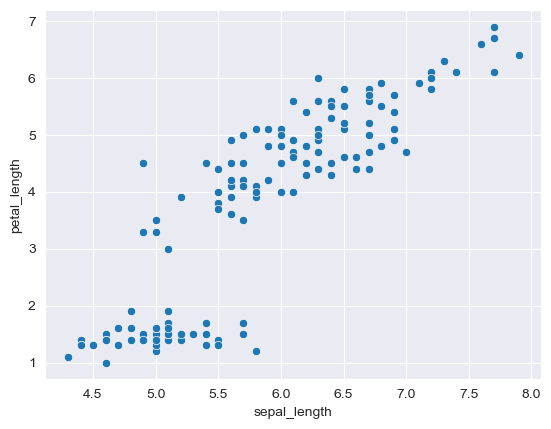

In [3]:
x = iris['sepal_length']
y = iris['petal_length']

sns.set_style('darkgrid')
_ = sns.scatterplot(x=x, y=y)

Consider fitting a line to points on a **Cartesian plane** (2-D surface, with $y$-axis perpendicular to horizontal $x$-axis). To fit such a line, the only parameters we require are a $y$-intercept (say, $\beta_0$) and a slope (say, $\beta_1$):

$$ y = \beta_0 + \beta_1 x $$

This corresponds to the case where we have a single feature (a single predictor variable, $x$) in a regression model:

$$ y = \beta_0 + \beta_1 x + \epsilon $$

The $\epsilon$ (epsilon) term denotes **error**. For a given instance $i$, $\epsilon_i$ is a measure of the difference between the true $y_i$ and the model's estimate, $\hat{y}_i$. If the model predicts $y_i$ perfectly, then $\epsilon_i = 0$.

Our objective is to find the parameters $\beta_0$ and $\beta_1$ that minimize $\epsilon$ across all the available data points.

(Note that sepal length may not be an ideal example of a predictor variable, but these iris data are conveniently available at this stage of the notebook.)

In the case of a model with a single predictor $x$, there is a fairly straightforward **linear least squares** formula we can use to estimate $\beta_1$:
$$ \hat{\beta}_1 = \frac{\text{cov}(x,y)}{\sigma^2_x} $$

(We'll dig further into the "least squares" concept in the next section, for now we can think of it as minimizing the squared error $(\hat{y}_i - y_i)^2$, which we isolate from $\text{cov}(x,y)$ via division by $\sigma^2_x$)

In [4]:
xbar, ybar = np.mean(x), np.mean(y)
print(xbar, ybar)

5.843333333333334 3.7580000000000005


In [5]:
n = iris.sepal_length.size

In [6]:
product = []
for i in range(n):
    product.append((x[i] - xbar) * (y[i] - ybar))
    
cov = sum(product) / n
cov

np.float64(1.2658200000000006)

In [7]:
beta_1 = cov / np.var(x)
beta_1

np.float64(1.8584329782548417)

With $\hat{\beta}_1$ in hand, we can then rearrange the line equation ($y = \beta_0 + \beta_1 x$) to estimate $\beta_0$:
$$ \hat{\beta}_0 = \bar{y} - \hat{\beta}_1 \bar{x} $$

In [8]:
beta_0 = ybar - beta_1 * xbar
beta_0

np.float64(-7.101443369602459)

In [9]:
xline = np.linspace(4, 8, 1000)
yline = beta_0 + beta_1 * xline


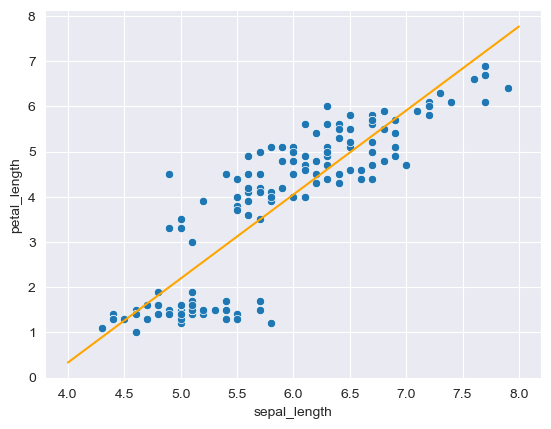

In [10]:
sns.set_style('darkgrid')
_ = sns.scatterplot(x=x, y=y)
_ = plt.plot(xline, yline, c='orange')

In regression model terms, if we were provided with a sepal length $x_i$ we could now use the parameter estimates $\hat{\beta}_0$ and $\hat{\beta}_1$ to predict the petal length of an iris:
$$ \hat{y}_i = \hat{\beta}_0 + \hat{\beta}_1 x_i $$

For instance, our model predicts that an iris with a 5.5cm-long sepal would have 3.1cm-long petal:

In [11]:
x_i = 5.5
y_i = beta_0 + beta_1 * x_i
y_i

np.float64(3.1199380107991708)

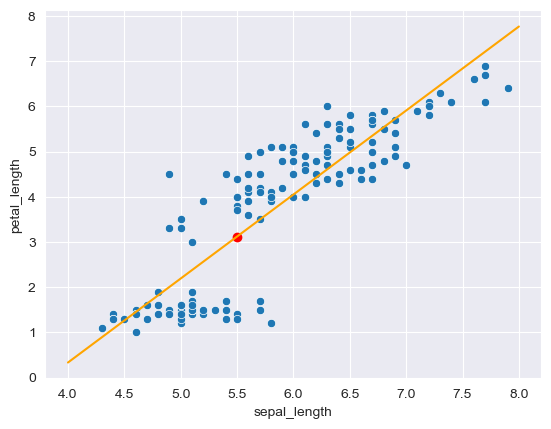

In [12]:
sns.scatterplot(x=x, y=y)
_ = plt.plot(xline, yline, c='orange')
_ = plt.scatter(x_i, y_i, c='red', marker='o')

As a second example, using the same simulated "Alzheimer's drug" data as the [*Regression in PyTorch* notebook](https://github.com/jonkrohn/ML-foundations/blob/master/notebooks/regression-in-pytorch.ipynb) and several others in the *ML Foundations* series:

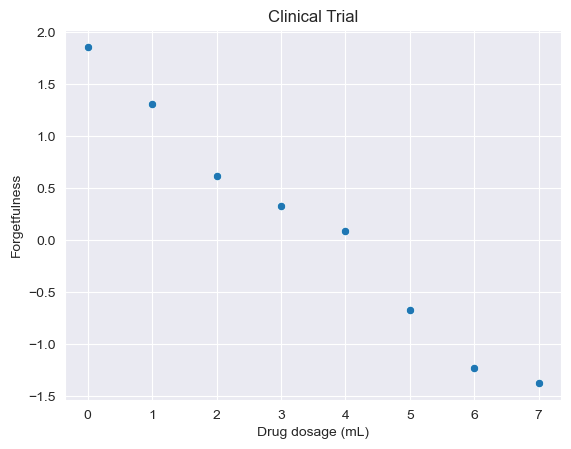

In [13]:
x = np.array([0, 1, 2, 3, 4, 5, 6, 7.])
y = np.array([1.86, 1.31, .62, .33, .09, -.67, -1.23, -1.37])

sns.scatterplot(x=x, y=y)
plt.title("Clinical Trial")
plt.xlabel("Drug dosage (mL)")
_ = plt.ylabel("Forgetfulness")

In [14]:
cov_mat = np.cov(x, y)
cov_mat

array([[ 6.        , -2.81571429],
       [-2.81571429,  1.34362143]])

$$ \hat{\beta}_1 = \frac{\text{cov}(x,y)}{\sigma^2_x} $$

In [15]:
beta_1 = cov_mat[0, 1] / cov_mat[0, 0]
beta_1

np.float64(-0.4692857142857143)

...and that:
$$ \hat{\beta}_0 = \bar{y} - \hat{\beta}_1 \bar{x} $$

In [16]:
ybar = np.mean(y)
xbar = np.mean(x)
beta_0 = ybar - beta_1 * xbar
beta_0

np.float64(1.76)

...and, of course, our regression formula:
$$ \hat{y}_i = \hat{\beta}_0 + \hat{\beta}_1 x_i $$

In [17]:
xline = np.linspace(0, 7, 1000)
yline = beta_0 + beta_1 * xline

By administering 4.5mL of the drug, our model predicts a forgetfulness score of -0.35:

In [18]:
x_i = 4.5
y_i = beta_0 + beta_1 * x_i
x_i, y_i

(4.5, np.float64(-0.35178571428571437))

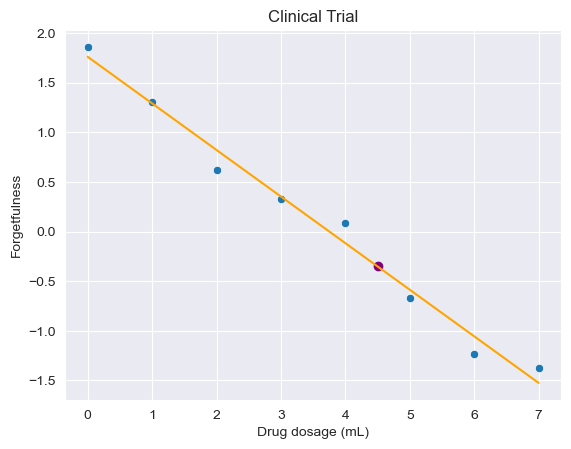

In [19]:
_ = sns.scatterplot(x=x, y=y)
plt.title("Clinical Trial")
plt.xlabel("Drug dosage (mL)")
plt.ylabel("Forgetfulness")
plt.plot(xline, yline, color='orange')
_ = plt.scatter(x_i, y_i, marker='o', color='purple')

**Exercise**: With data from female Adélie penguins, create a linear least squares model that predicts body mass with flipper length. Predict the mass of a female Adélie penguin that has a flipper length of 197mm.

In [20]:
penguins = sns.load_dataset('penguins')
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [21]:
adelie = penguins[penguins['species'] == 'Adelie'].dropna()
adelie.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male


In [22]:
adelie.size

1022

In [23]:
adelie["body_mass_kg"] = adelie["body_mass_g"] / 1000
adelie.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,body_mass_kg
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male,3.75
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female,3.80
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female,3.25
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female,3.45
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male,3.65


<Axes: xlabel='flipper_length_mm', ylabel='body_mass_kg'>

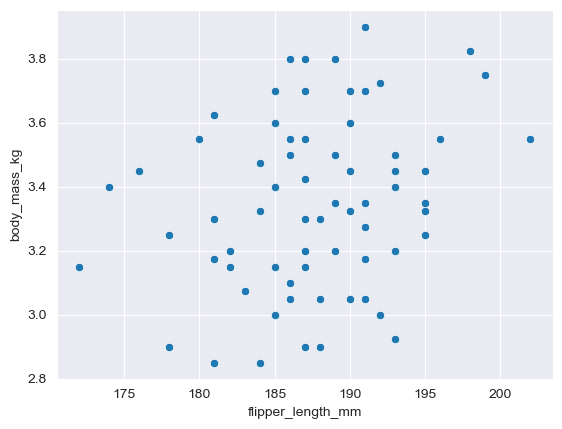

In [25]:
x = adelie[adelie["sex"] == "Female"]['flipper_length_mm']
y = adelie[adelie["sex"] == "Female"]['body_mass_kg']

sns.scatterplot(x=x, y=y)

In [26]:
cov_mat = np.cov(x, y)
cov_mat

array([[31.304414  ,  0.3962852 ],
       [ 0.3962852 ,  0.07256564]])

Finding Beta 1:
$$ \hat{\beta}_1 = \frac{\text{cov}(x,y)}{\sigma^2_x} $$

In [27]:
beta_1 = cov_mat[0, 1] / cov_mat[0, 0]
beta_1

np.float64(0.012659083726357767)

...and that:
$$ \hat{\beta}_0 = \bar{y} - \hat{\beta}_1 \bar{x} $$

In [28]:
beta_0 = np.mean(y) - beta_1 * np.mean(x)
beta_0

np.float64(0.9915290574707036)

...and, of course, our regression formula:
$$ \hat{y}_i = \hat{\beta}_0 + \hat{\beta}_1 x_i $$

In [29]:
xline = np.linspace(170, 205, 1000)
yline = beta_0 + beta_1 * xline

To Predict the mass of a female Adélie penguin that has a flipper length of 197mm

In [30]:
x_i = 197
y_i = beta_0 + beta_1 * x_i
x_i, y_i

(197, np.float64(3.485368551563184))

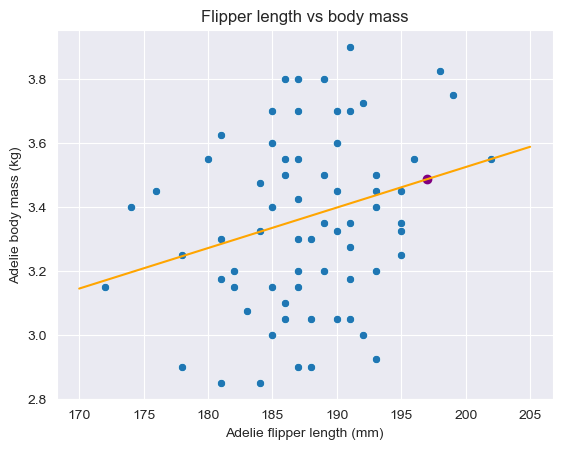

In [31]:
_ = sns.scatterplot(x=x, y=y)
plt.title("Flipper length vs body mass")
plt.xlabel("Adelie flipper length (mm)")
plt.ylabel("Adelie body mass (kg)")
plt.plot(xline, yline, color='orange')
_ = plt.scatter(x_i, y_i, marker='o', color='purple')